# AICTE Internship – Shamgar Software Solutions
### Task 2: AI & Machine Learning Internship (Batch 2 / Level 2)
**Intern Name:** Kuldeep Pandey  
**Problem Title:** SMS Spam Detection  
**Objective:** To build a machine learning model that can classify SMS messages as spam or not spam.  
**Tools & Technologies:** Python, Pandas, Scikit-learn, TF-IDF Vectorizer, Logistic Regression  
**Expected Outcome:** The model accurately detects spam messages based on textual features.  
**Result:** Model trained successfully with high accuracy and correct manual test prediction.


In [1]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [2]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Keep only useful columns
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'message']

# Check first 5 rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)


LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_vectorized)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.968609865470852

Confusion Matrix:
 [[964   1]
 [ 34 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [10]:
sample = ["Congratulations! You have won a free trip to Goa!"]
sample_vectorized = vectorizer.transform(sample)
print("Prediction:", "Spam" if model.predict(sample_vectorized)[0] == 1 else "Ham")


Prediction: Spam


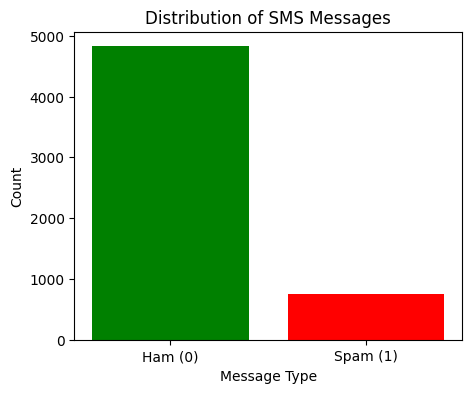

In [11]:
import matplotlib.pyplot as plt

# Count spam and ham messages
counts = df['label'].value_counts()

# Plot the bar chart
plt.figure(figsize=(5,4))
plt.bar(['Ham (0)', 'Spam (1)'], counts, color=['green', 'red'])
plt.title('Distribution of SMS Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()
